<a href="https://colab.research.google.com/github/naveen-6735/AI-ML-IIITH/blob/main/aiml_module_1_lab_1_extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
eng1

'The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes were thought to be one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into up to eight extant species due to new research into their mitochondrial and nuclear DNA, as well as morphological measurements. Seven other extinct species of Giraffa are known from the fossil record.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits, and flowers of woody p

In [ ]:
eng2

'Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant, the African forest elephant, and the Asian elephant. They are the only surviving members of the family Elephantidae and the order Proboscidea; extinct relatives include mammoths and mastodons. Distinctive features of elephants include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but sensitive grey skin. The trunk is prehensile, bringing food and water to the mouth and grasping objects. Tusks, which are derived from the incisor teeth, serve both as weapons and as tools for moving objects and digging. The large ear flaps assist in maintaining a constant body temperature as well as in communication. African elephants have larger ears and concave backs, whereas Asian elephants have smaller ears and convex or level backs.\nElephants are scattered throughout sub-Saharan Africa, South Asia, and Southeast Asia and are found in differe

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  """
  ^ ----> negation
  ^a-z ----> no characters belonging to a-z
  []+ ----> one or more occurences of the preceding pattern
  Substitute with empty string "" that satisfy the condition
  """
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)
print(type(eng1))

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted)) # unzipping
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
print(unigram_eng1)
print(type(unigram_eng1))
print(len(unigram_eng1))

Counter({('e',): 3940, ('a',): 2939, ('t',): 2529, ('i',): 2430, ('s',): 2247, ('n',): 2128, ('r',): 2083, ('o',): 2083, ('h',): 1445, ('l',): 1388, ('d',): 1145, ('f',): 1078, ('c',): 1009, ('g',): 950, ('m',): 823, ('u',): 803, ('p',): 667, ('b',): 446, ('y',): 424, ('w',): 386, ('v',): 373, ('k',): 231, ('x',): 81, ('z',): 32, ('j',): 22, ('q',): 14})
<class 'collections.Counter'>
26


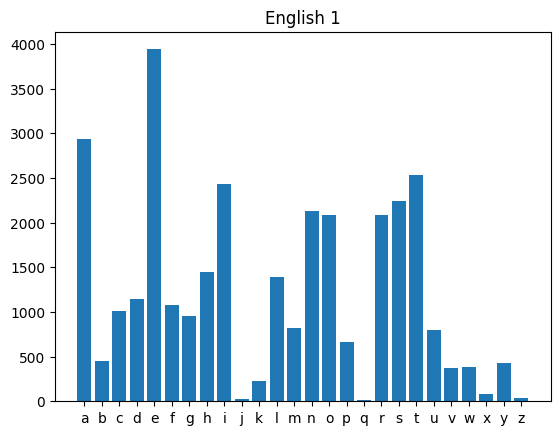

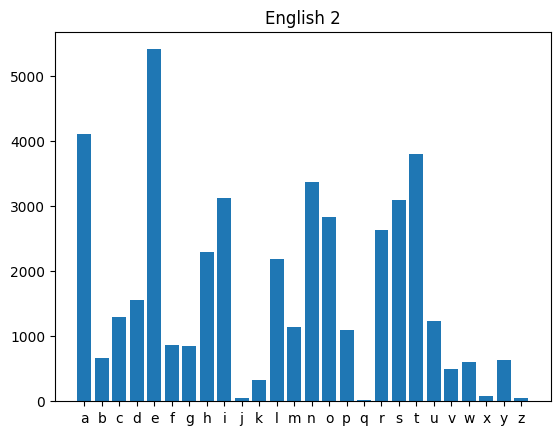

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1)) # Counter collection used for counting the frequency of elements
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

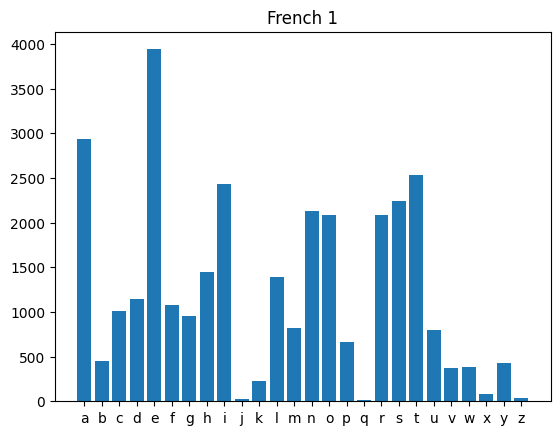

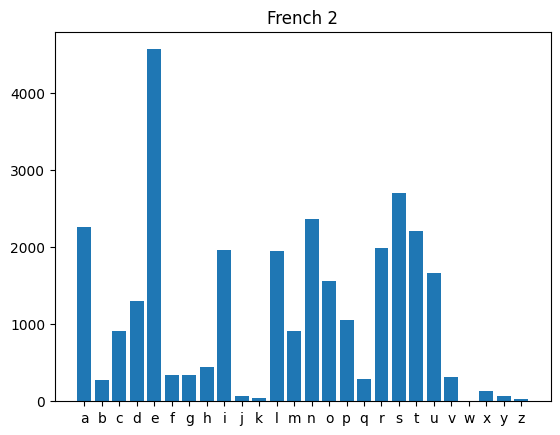

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

In [ ]:
bigram_eng1 = Counter(ngrams(eng1, 2)) # bigrams
print(f"Total number of bigrams = {len(bigram_eng1)}")
print("Total number of combinations of alphabets = {}".format(26*26))
print(bigram_eng1)

Total number of bigrams = 498
Total number of combinations of alphabets = 676
Counter({('t', 'h'): 842, ('h', 'e'): 697, ('e', 's'): 665, ('i', 'n'): 594, ('a', 'n'): 538, ('e', 'r'): 478, ('r', 'e'): 454, ('r', 'a'): 441, ('a', 'l'): 404, ('n', 'd'): 393, ('s', 't'): 370, ('o', 'n'): 367, ('e', 'a'): 348, ('a', 't'): 345, ('n', 'g'): 331, ('e', 'n'): 324, ('t', 'i'): 323, ('a', 'r'): 321, ('i', 'r'): 316, ('n', 't'): 309, ('t', 'e'): 292, ('f', 'e'): 289, ('g', 'i'): 281, ('e', 'd'): 278, ('l', 'e'): 269, ('i', 't'): 267, ('f', 'f'): 264, ('a', 'f'): 261, ('o', 'r'): 259, ('t', 'o'): 248, ('m', 'a'): 247, ('s', 'a'): 243, ('h', 'a'): 241, ('e', 'c'): 240, ('r', 'o'): 237, ('s', 'e'): 235, ('a', 's'): 231, ('v', 'e'): 228, ('s', 'i'): 215, ('i', 's'): 213, ('o', 'f'): 197, ('n', 'e'): 194, ('o', 'u'): 189, ('l', 'a'): 184, ('t', 's'): 179, ('s', 'o'): 175, ('c', 'a'): 173, ('e', 't'): 172, ('c', 'o'): 171, ('n', 'a'): 168, ('e', 'g'): 166, ('i', 'c'): 164, ('r', 'i'): 162, ('l', 'i'): 

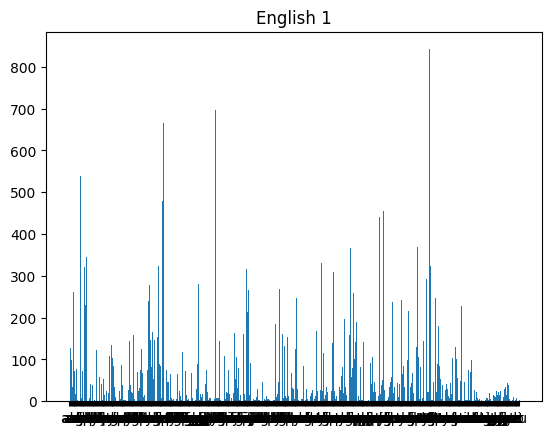

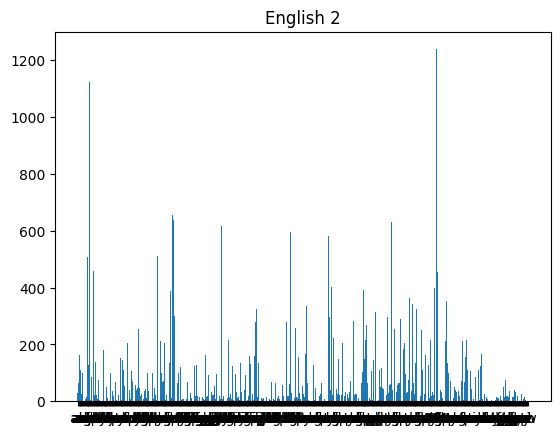

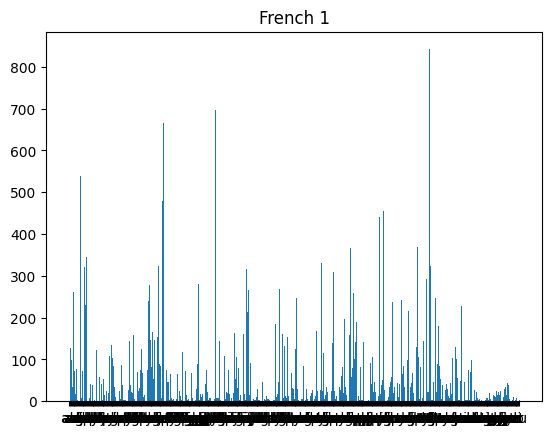

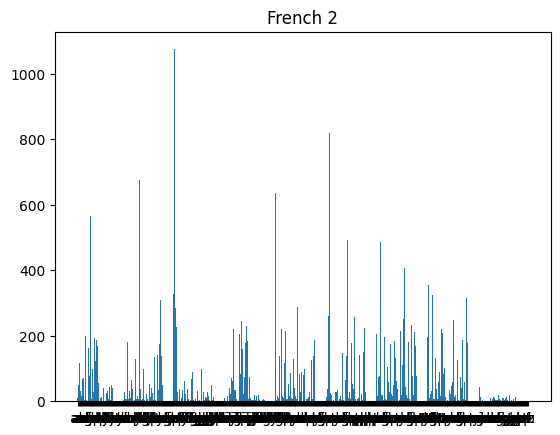

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
chr(ord('a')+1), chr(ord('a')+0)

('b', 'a')

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

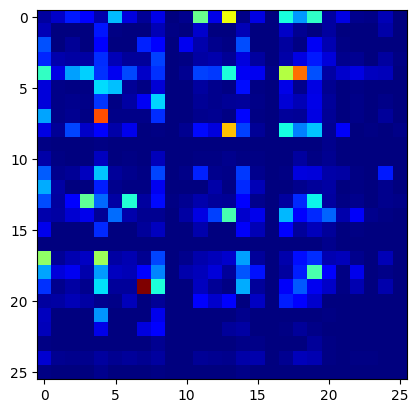

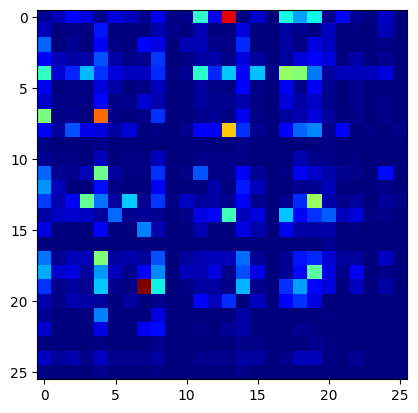

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)
#heatmap

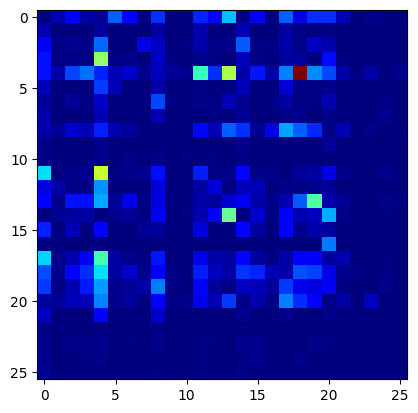

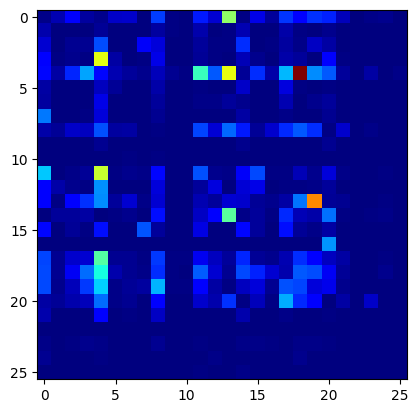

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  print(f)
  arg = np.argsort(-f) # '-' for getting the indices in the descending order
  print(arg)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
[ 24.  55. 128.  99.  35. 261.  72.  17.  78.   2.  10. 404.  76. 538.
   7.  73.   1. 321. 231. 345.  24.  75.  13.   7.  42.   1.  40.   1.
   3.   1. 123.   4.   0.   0.  41.   4.   0.  59.   1.   0.  42.   2.
   0.  53.  16.   1.  25.   0.   0.   0.  30.   0. 173.   0.  19.   0.
 108.   0.   1. 134. 103.   0.  84.  35.  10.   4. 171.   1.   1.  25.
   6.  87.  39.   4.   2.   0.   2.   0. 137.  34.  27.  28. 143.  40.
  22.  20. 159.   0.   6.  28.  36.  17.  71.  24.   0.  32.  74. 125.
  67.  10.  15.   0.  25.   5. 348.  75. 240. 278. 146.  83. 166.  54.
 146.   1.  14. 159. 153. 324.  88.  85.   8. 478. 665. 172.  29.  58.
  74.  47.  46.   3.  66.   9.   4.   6. 289. 264.  19.   5.  65.   0.
   1.  25.  12.   4. 117.   4.   0.  78.  13.  73.  15.   2.   5.   0.
   1.   1.  67.   7.  12.   9. 149.   4.  29.  88. 281.   2.   0.  18.
  11.  17.  23.   8.   0.  64.  41.  76.  23.   2.   9.   0.   9.   1.
 241.   8.  16.   5. 697.   8.   7.   9. 144.   2.   1.  11.  14.

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [ ]:
topic1 = 'Chimpanzee'
topic2 = 'Elephant'

wikipedia.set_lang('it') # Italian

it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

wikipedia.set_lang('de') # German

de1 = wikipedia.page(topic1).content
de2 = wikipedia.page(topic2).content

In [ ]:
it1 = cleanup(it1)
it2 = cleanup(it2)

de1 = cleanup(de1)
de2 = cleanup(de2)

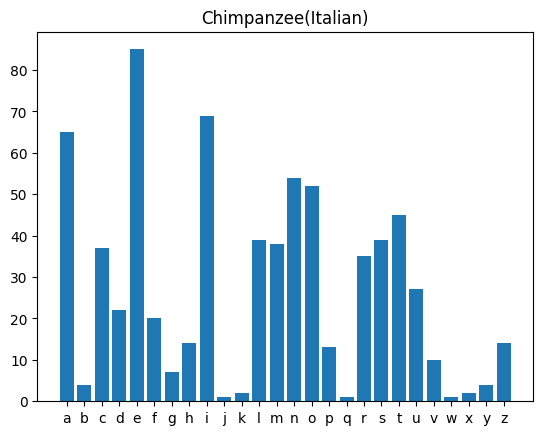

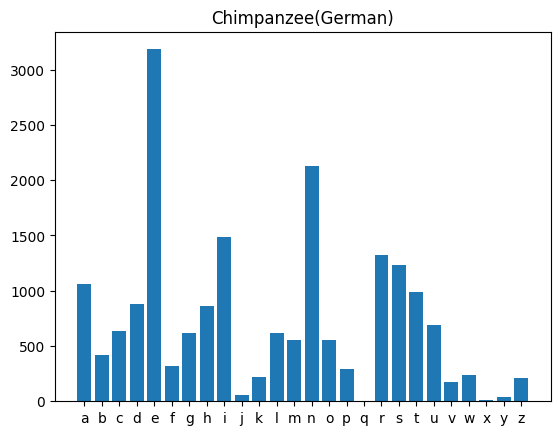

In [ ]:
unigram_it1 = Counter(ngrams(it1,1)) # Counter collection used for counting the frequency of elements
plothistogram(unigram_it1)
plt.title('Chimpanzee(Italian)')
plt.show()
unigram_de1 = Counter(ngrams(de1,1)) # Counter collection used for counting the frequency of elements
plothistogram(unigram_de1)
plt.title('Chimpanzee(German)')
plt.show()
# unigram_it2 = Counter(ngrams(it2,1))
# plothistogram(unigram_it2)
# plt.title('Italian 2')
# plt.show()

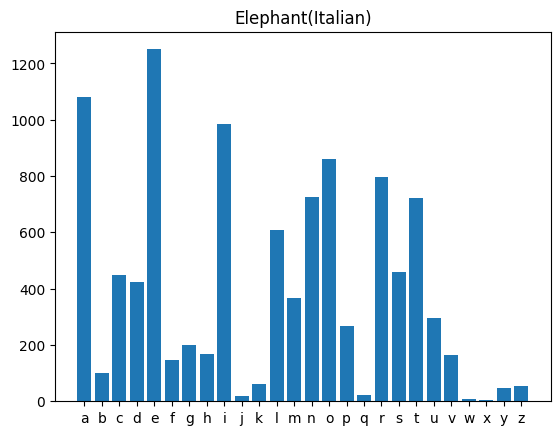

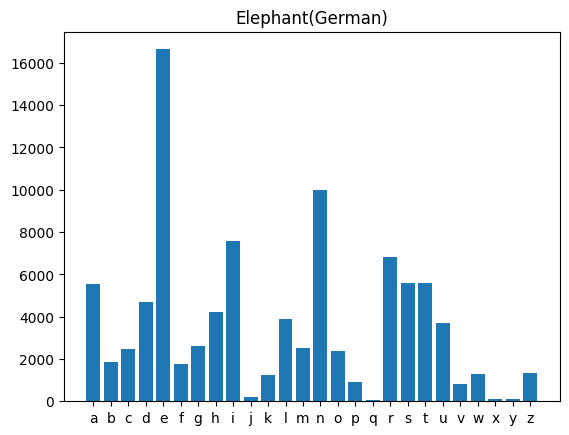

In [ ]:
unigram_it2 = Counter(ngrams(it2,1))
plothistogram(unigram_it2)
plt.title('Elephant(Italian)')
plt.show()
unigram_de2 = Counter(ngrams(de2,1))
plothistogram(unigram_de2)
plt.title('Elephant(German)')
plt.show()

### The unigrams of languages Italian and German for similar topics also have similar distribution.

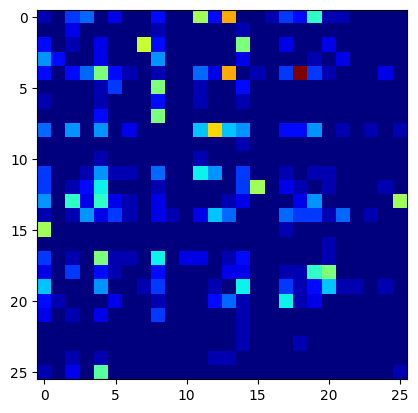

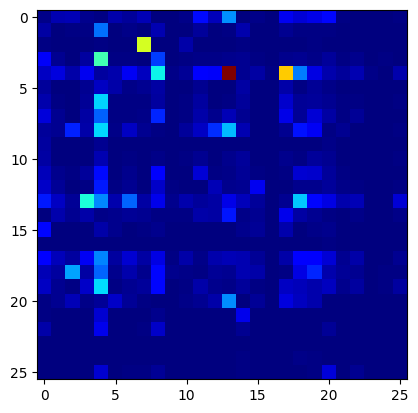

In [ ]:
bigram_it1 = Counter(ngrams(it1, 2))
biit1 = plotbihistogram(bigram_it1)
plt.show()
bigram_de1 = Counter(ngrams(de1, 2))
bide1 = plotbihistogram(bigram_de1)
#heatmap

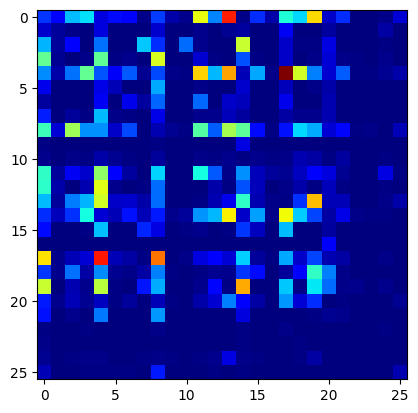

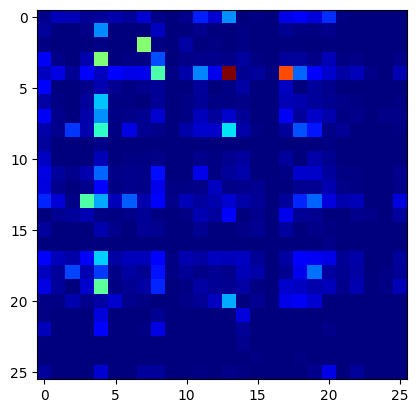

In [ ]:
bigram_it2 = Counter(ngrams(it2, 2))
biit2 = plotbihistogram(bigram_it2)
plt.show()
bigram_de2 = Counter(ngrams(de2, 2))
bide2 = plotbihistogram(bigram_de2)
#heatmap

### The bigrams are different for the same topics.

## Distribution for different topics

In [ ]:
topic1 = 'Chimpanzee'
topic2 = 'Gmail'

wikipedia.set_lang('it') # Italian

it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

wikipedia.set_lang('de') # German

de1 = wikipedia.page(topic1).content
de2 = wikipedia.page(topic2).content

In [ ]:
it2

'Gmail è un servizio gratuito non-libero di posta elettronica supportato da pubblicità fornito da Google. È possibile accedervi via web o tramite applicazioni che usano i protocolli POP3, IMAP o le API Google.È stato pubblicato il 1º aprile 2004 e solo il 7 luglio 2009, dopo oltre 5 anni di permanenza nello status di beta pubblica, è stato reso definitivo. Dispone di 15 GB di spazio gratuito (condiviso con tutti gli altri servizi offerti da Google all\'utente), ulteriormente aumentabili con pacchetti a pagamento. La versione principale webmail è realizzata in AJAX, è tuttavia disponibile una versione HTML che non necessita di JavaScript.\n\n\n== Storia ==\nIl nome Gmail compare per la prima volta in Italia nel 2000 sul sito Sitomito, creato da Paul Buchheit, in riferimento al suo nome d\'arte "G".\nQuando Google annunciò Gmail il 1º aprile 2004 i più pensarono a un pesce d\'aprile. Infatti Gmail era provvisto di alcune funzionalità, come 1 GB di spazio a disposizione, che all\'epoca er

In [ ]:
it1 = cleanup(it1)
it2 = cleanup(it2)

de1 = cleanup(de1)
de2 = cleanup(de2)

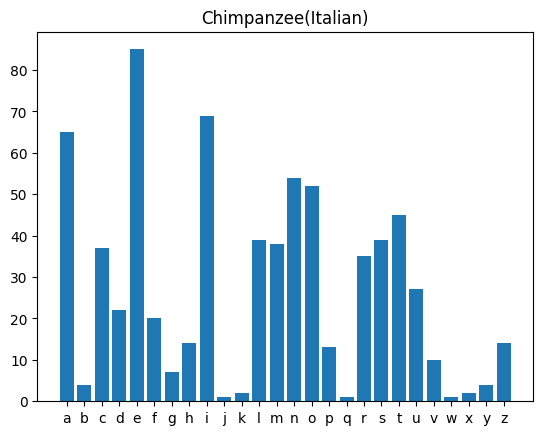

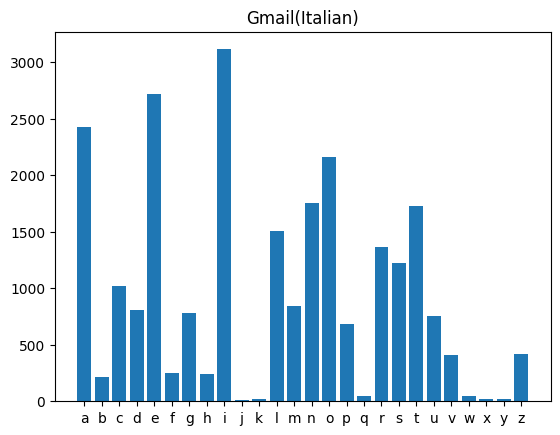

In [ ]:
unigram_it1 = Counter(ngrams(it1,1)) # Counter collection used for counting the frequency of elements
plothistogram(unigram_it1)
plt.title('Chimpanzee(Italian)')
plt.show()
unigram_it2 = Counter(ngrams(it2,1)) # Counter collection used for counting the frequency of elements
plothistogram(unigram_it2)
plt.title('Gmail(Italian)')
plt.show()

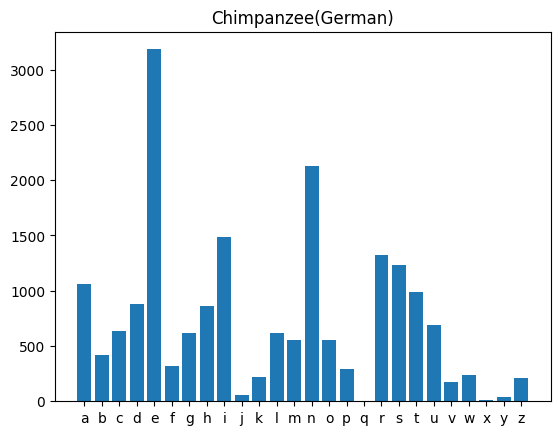

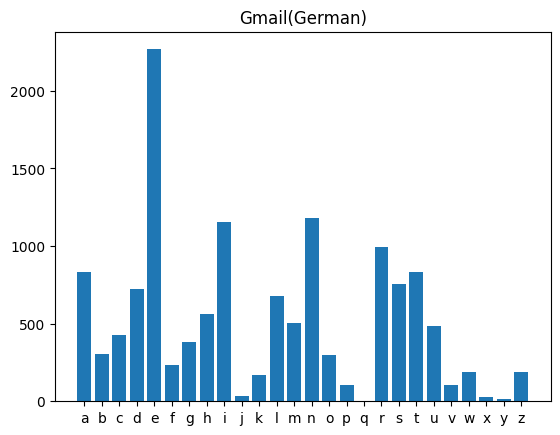

In [ ]:
unigram_de1 = Counter(ngrams(de1,1)) # Counter collection used for counting the frequency of elements
plothistogram(unigram_de1)
plt.title('Chimpanzee(German)')
plt.show()
unigram_de2 = Counter(ngrams(de2,1)) # Counter collection used for counting the frequency of elements
plothistogram(unigram_de2)
plt.title('Gmail(German)')
plt.show()

### The unigrams are very similar for both the languages even though the topics are different.

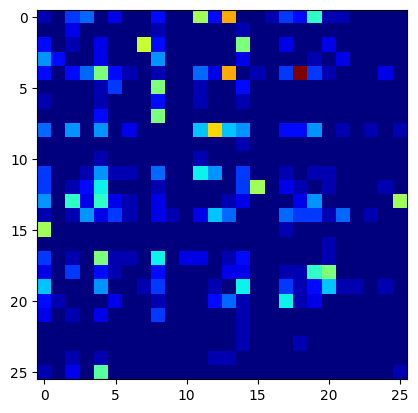

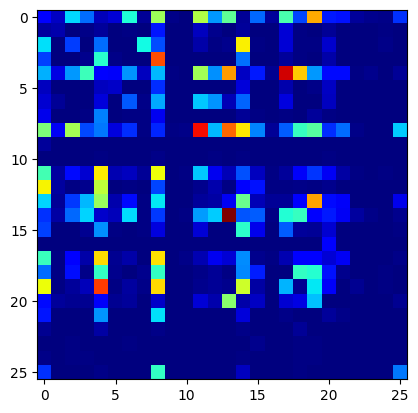

In [ ]:
bigram_it1 = Counter(ngrams(it1, 2))
biit1 = plotbihistogram(bigram_it1)
plt.show()
bigram_it2 = Counter(ngrams(it2, 2))
bide1 = plotbihistogram(bigram_it2)
#heatmap

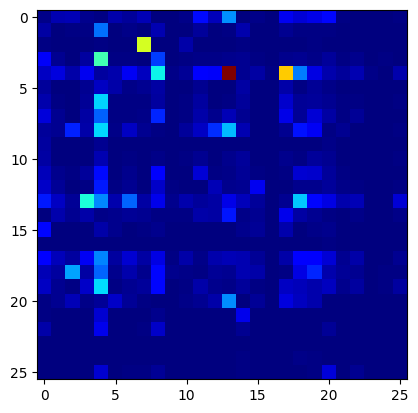

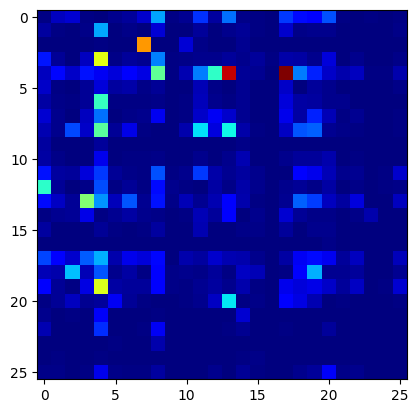

In [ ]:
bigram_de1 = Counter(ngrams(de1, 2))
bide1 = plotbihistogram(bigram_de1)
plt.show()
bigram_de2 = Counter(ngrams(de2, 2))
bide2 = plotbihistogram(bigram_de2)
#heatmap

### For Italian language the bigrams look little different but for German language the bigrams are very similar.

### Visualizing Trigrams

In [ ]:
def plottrihistogram(ngram, kk):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii, jj] = ngram[(chr(ord('a')+kk), chr(ord('a')+ii), chr(ord('a')+jj))]
      # print(freq[ii, jj])
  # plt.imshow(freq, cmap = 'jet')
  return freq

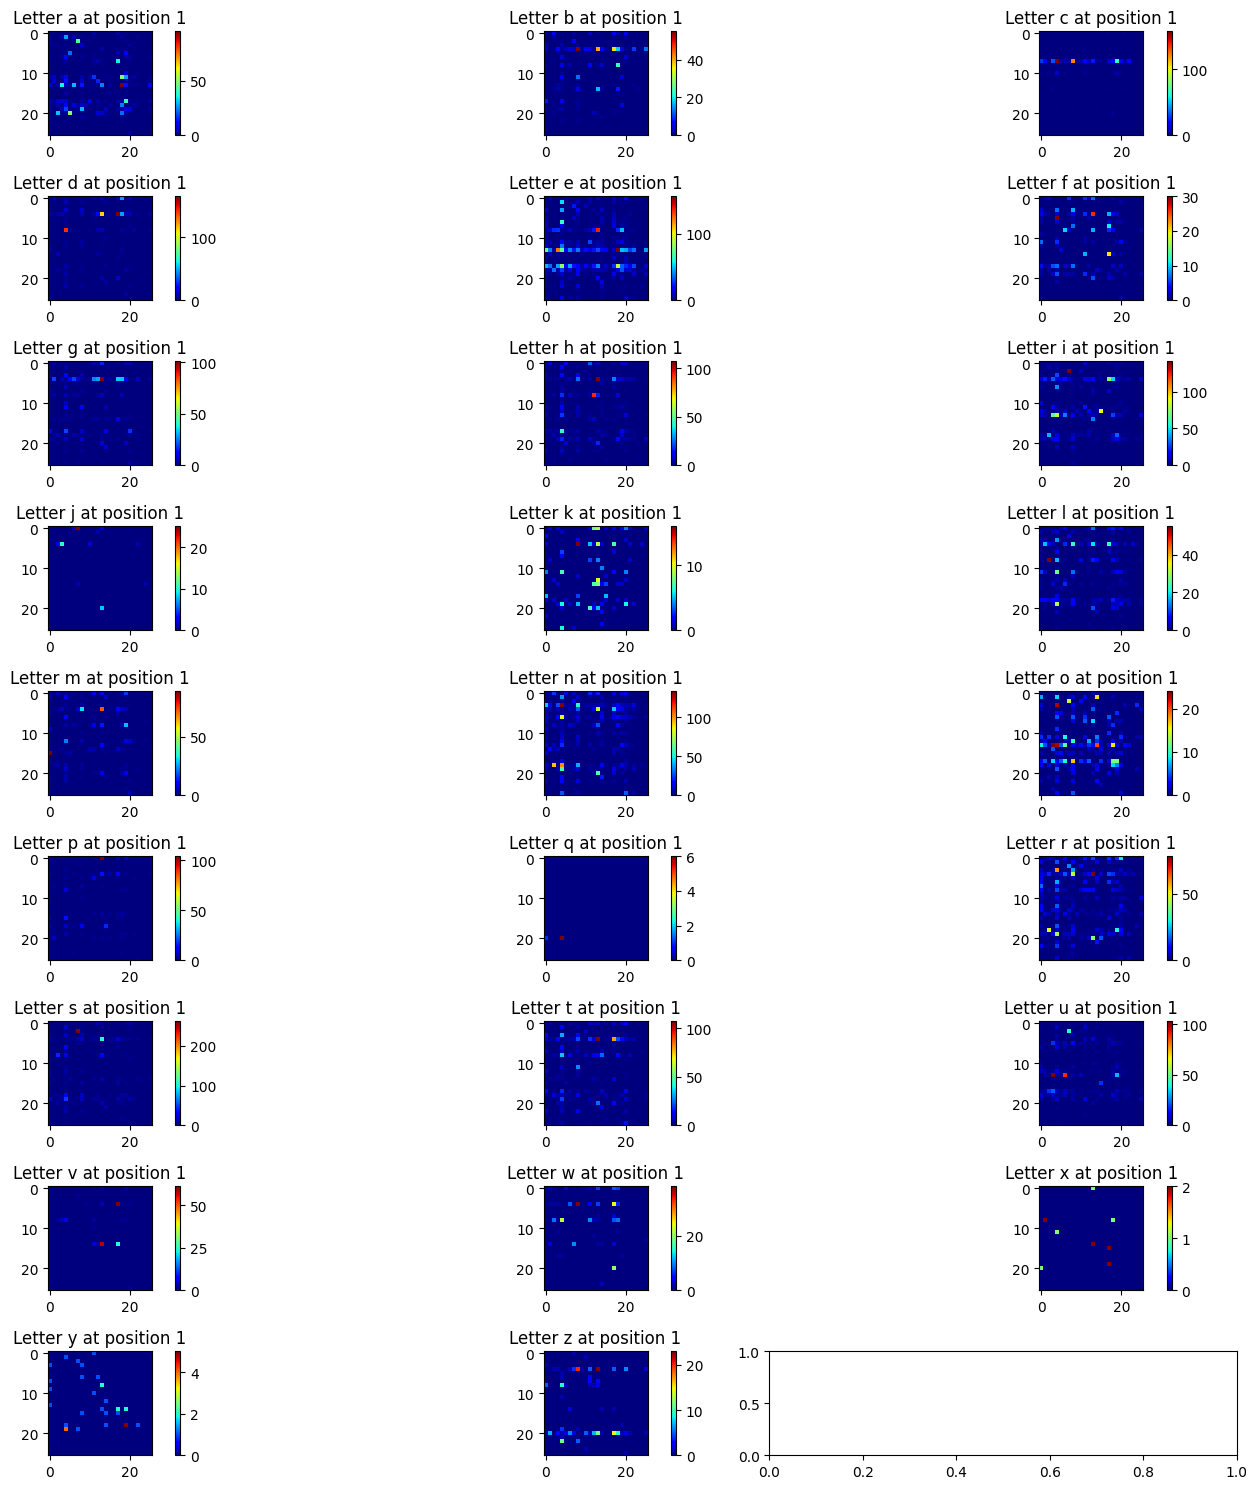

In [ ]:
trigram_de1 = Counter(ngrams(de1, 3))

fig, axes = plt.subplots(9, 3, figsize=(15, 15))
axes = axes.ravel()

for i in range(26):
    tride1 = plottrihistogram(trigram_de1, i)
    im = axes[i].imshow(tride1, cmap='jet')
    axes[i].set_title(f'Letter {chr(ord("a")+i)} at position 1')
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
train_X.shape

(60000, 28, 28)

Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

In [ ]:
no1

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Let us visualize a few images here:

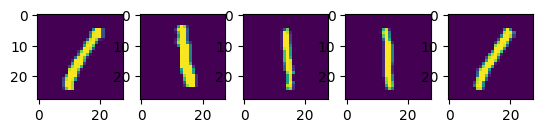

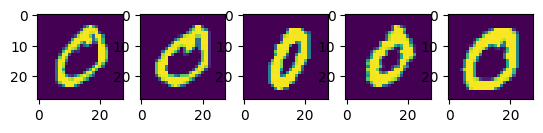

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
no0.shape, no1.shape

((5923, 28, 28), (6742, 28, 28))

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

In [ ]:
sum1 = np.sum(no1>0, (0,2))
print(sum1.shape)
sum1

(28,)


array([    0,     6,    69,   585, 14811, 25168, 27996, 29038, 29350,
       29523, 29765, 29775, 29829, 29691, 29590, 29687, 29840, 29779,
       29920, 30256, 30715, 30757, 29328, 25484,  7571,   236,     5,
           0])

In [ ]:
sum1 = np.sum(no1>0, (1,2))
print(sum1.shape)
sum1

(6742,)


array([96, 93, 68, ..., 76, 96, 74])

In [ ]:
sum0

array([176, 198, 183, ..., 174, 204, 197])

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

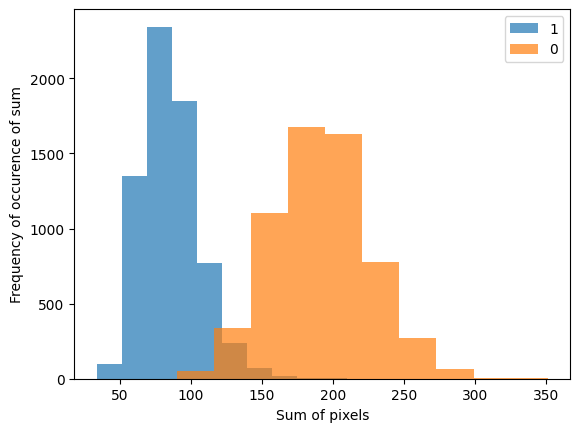

In [ ]:
plt.hist(sum1, alpha=0.7, label = '1');
plt.hist(sum0, alpha=0.7, label = '0');
plt.xlabel('Sum of pixels')
plt.ylabel('Frequency of occurence of sum')
plt.legend()

#### As the number of pixels are more in the digit 0 it is separable from the digit 1.

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

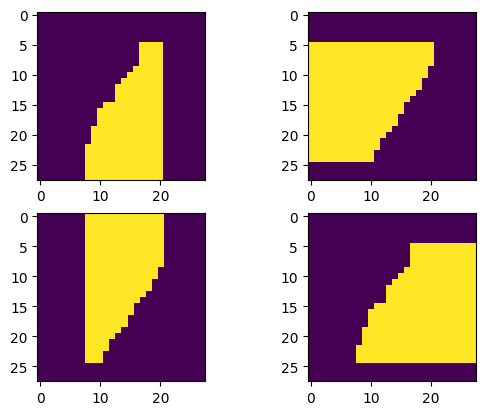

In [ ]:
img = no1[456,:,:]
plt.subplot(2,2,1)
im1 = cumArray(img)
plt.imshow(im1)
plt.subplot(2,2,2)
im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
plt.imshow(im2)
im3 = np.rot90(cumArray(np.rot90(img, 2)),2)
plt.subplot(2,2,3)
plt.imshow(im3)
im4 = np.rot90(cumArray(np.rot90(img, 3)),1)
plt.subplot(2,2,4)
plt.imshow(im4)

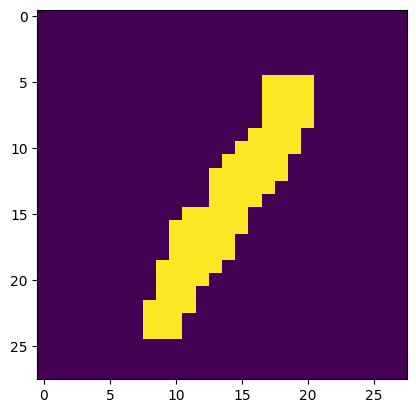

In [ ]:
hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the pixels that are 1
plt.imshow(hull)

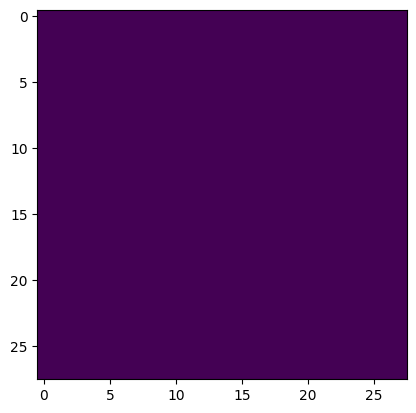

In [ ]:
hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
plt.imshow(hole)

(28, 28)
(28, 28)


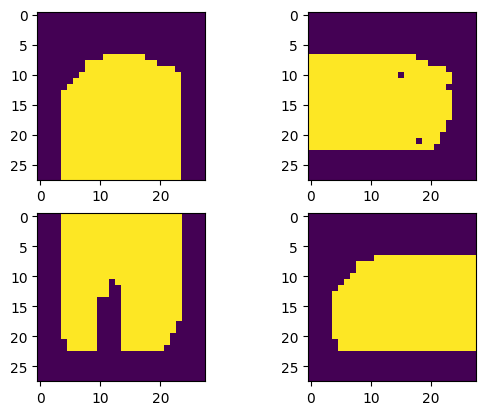

In [ ]:
img = no0[456,:,:]
print(img.shape)
plt.subplot(2,2,1)
im1 = cumArray(img)
print(im1.shape)
plt.imshow(im1)
plt.subplot(2,2,2)
im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
plt.imshow(im2)
im3 = np.rot90(cumArray(np.rot90(img, 2)),2)
plt.subplot(2,2,3)
plt.imshow(im3)
im4 = np.rot90(cumArray(np.rot90(img, 3)),1)
plt.subplot(2,2,4)
plt.imshow(im4)

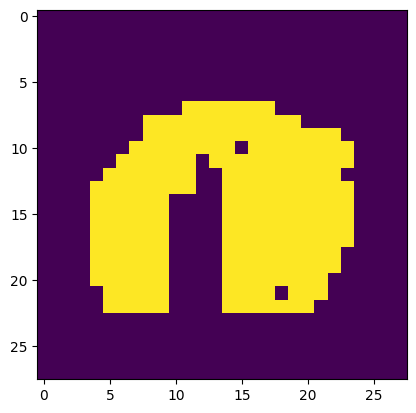

In [ ]:
hull =  im1 & im2 & im3 & im4  # this will create a binary image with all the pixels that are 1
plt.imshow(hull)

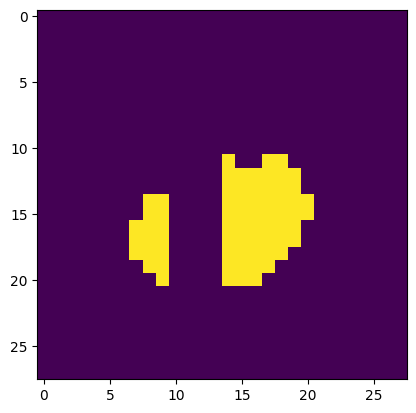

In [ ]:
hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
plt.imshow(hole)

Visualize a few:

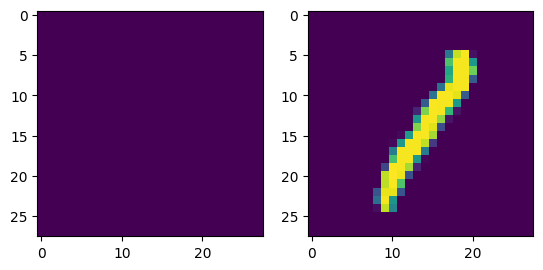

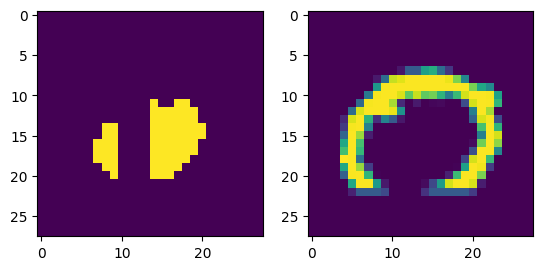

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

#### As there's a gap at the bottom of the 0, a space is present in the hole.

Now let us plot the number of hole pixels and see how this feature behaves

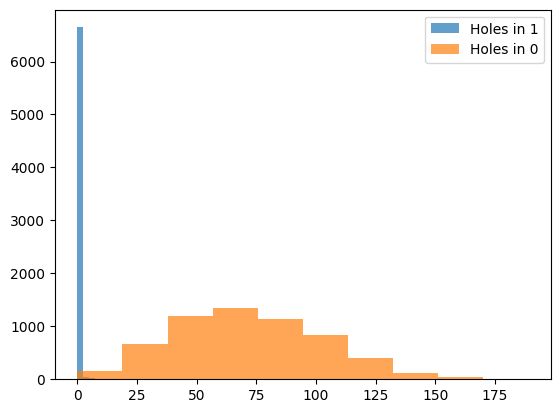

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7, label = 'Holes in 1');
plt.hist(hole0, alpha=0.7, label = 'Holes in 0');
plt.legend()

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

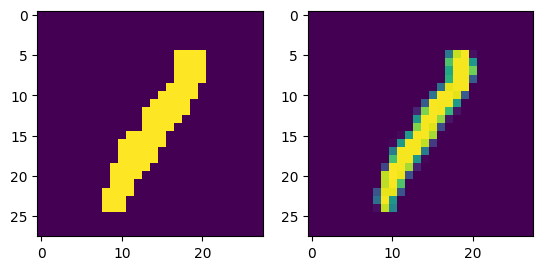

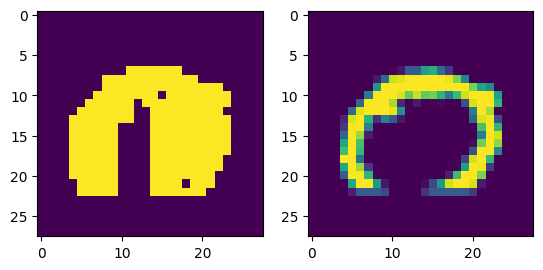

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

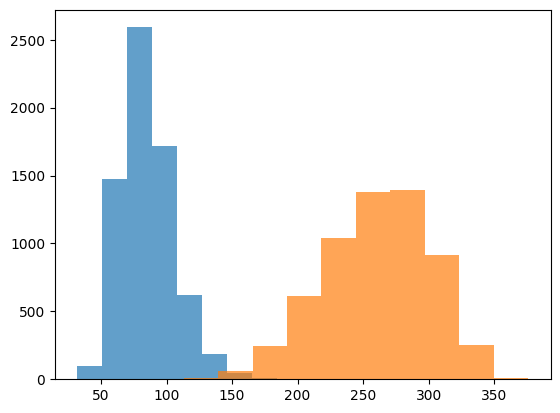

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1) # np.roll(arr, shift, axis)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

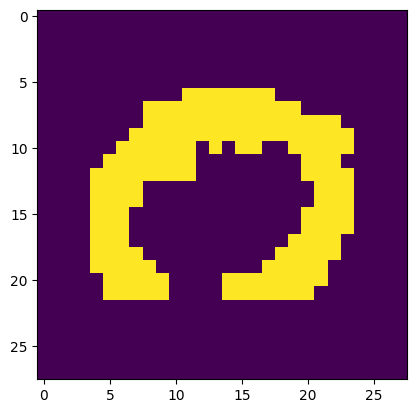

In [ ]:
plt.imshow(np.roll(img>0, -1, 0))

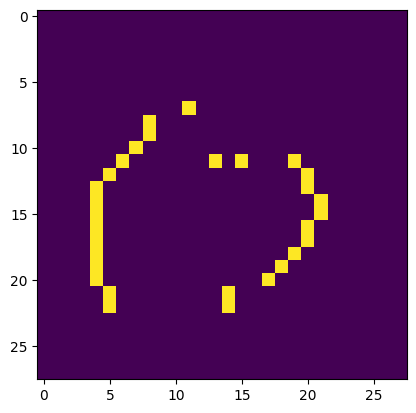

In [ ]:
rshift = np.roll(img>0, 1, 1)
plt.imshow(minus(img>0, rshift))

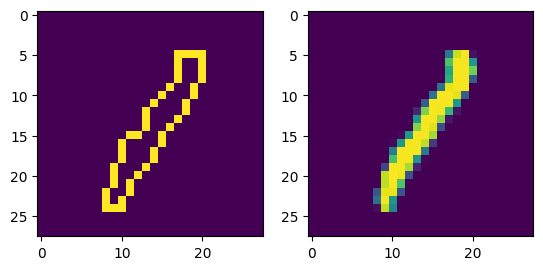

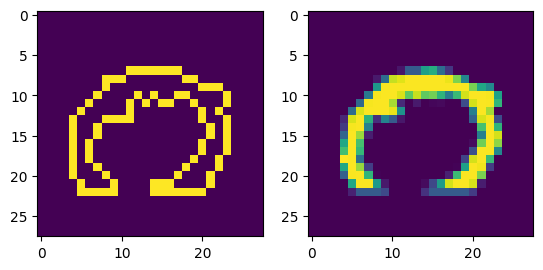

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

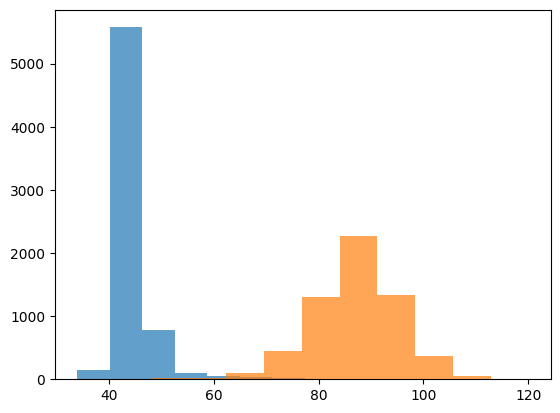

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

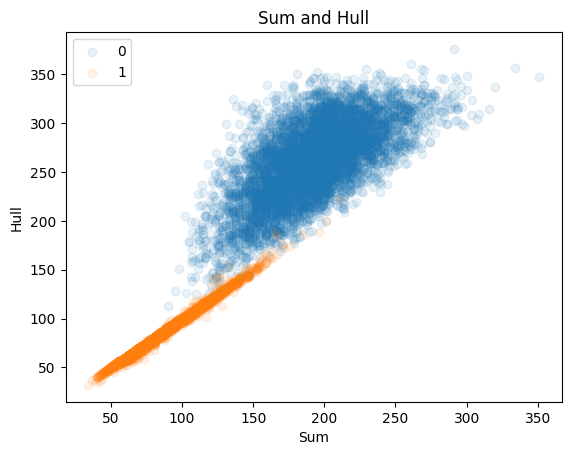

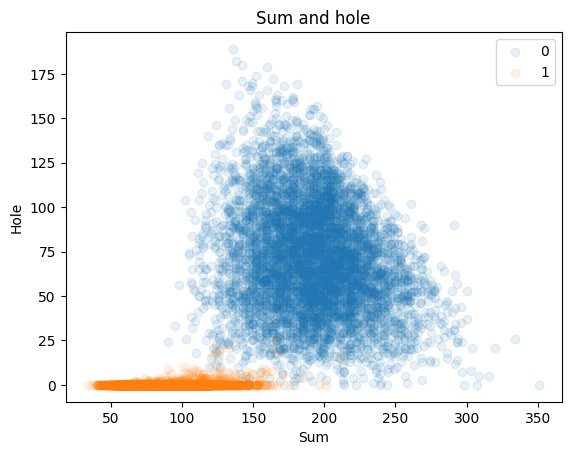

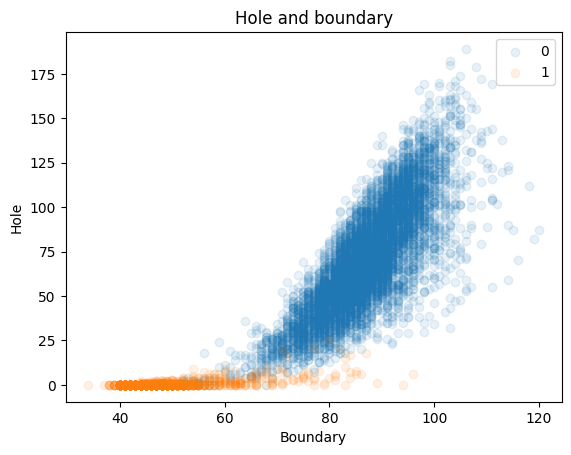

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.title('Sum and Hull')
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.title('Sum and hole')
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.title('Hole and boundary')
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

#### 1. Which is the best combination of the features?

#### The best combination of features would be:


*   Sum of pixels: Would be able to differentiate easily based on the stroke length.
*   Hull pixels: If the stroke length is same then the sum of the pixels would also be the same. If we fill in the holes then we can easily differentiate some of the numbers easily.
*  Hole pixels: Can find the number of holes



#### 2. How would you test or visualize four or more features?

Using Principal Component Analysis(PCA) we can visualize higher number of features.

#### 3. Can you come up with your own features?

* ##### We can identify/differentiate few of the numbers with number of holes they are having. For example the the number 3 has no holes and the number 6 has 1 hole, number 8 has 2 holes and so on.
* Digits like 6, 9, 0 have a single hole, it might be difficult to identify the digits solely based on the number of holes. To solve this issue we can classify/identify based in the sum of pixels below or above the holes.
The digit 6 has a stroke above the hole, 9 has stroke below the hole and the digit 0 has no stroke on either side.

#### 4. Will these features work for different classes other than 0 and 1?

In [ ]:
no3 = train_X[train_y==3,:,:]
no6 = train_X[train_y==6,:,:]

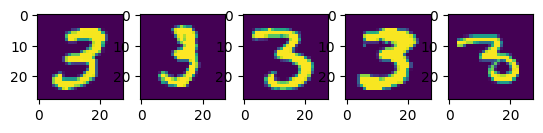

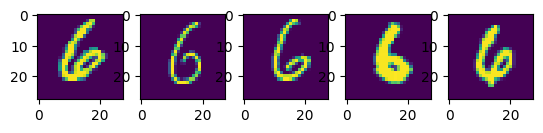

In [ ]:
for i in range(5):
  plt.subplot(2, 5, i+1)
  plt.imshow(no3[i, :, :])
plt.show()
for i in range(5):
  plt.subplot(2, 5, i+ 1)
  plt.imshow(no6[i, :, :])
plt.show()

##### Sum of pixels feature

In [ ]:
sum3 = np.sum(no3>0, (1,2))
sum6 = np.sum(no6>0, (1,2))

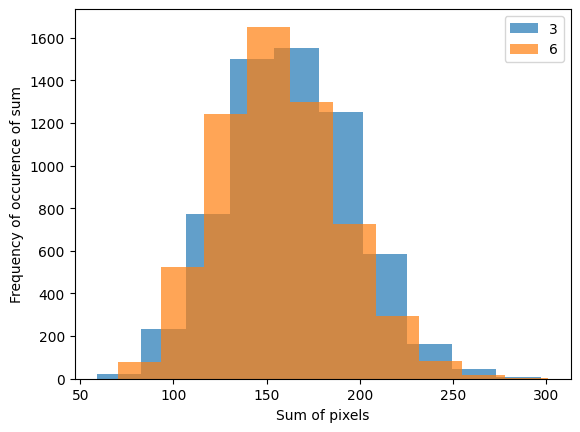

In [ ]:
plt.hist(sum3, alpha=0.7, label = '3');
plt.hist(sum6, alpha=0.7, label = '6');
plt.xlabel('Sum of pixels')
plt.ylabel('Frequency of occurence of sum')
plt.legend()

#### The sum of the pixels is almost same for the digits 3 and 6, we cannot differentiate both using the sum of pixels feature.

#### Hole pixels feature

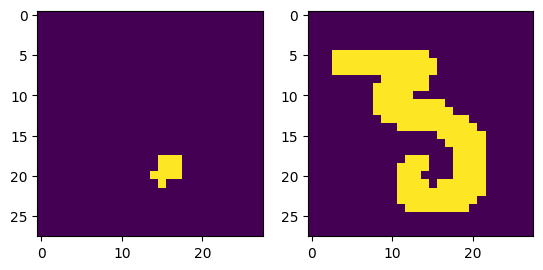

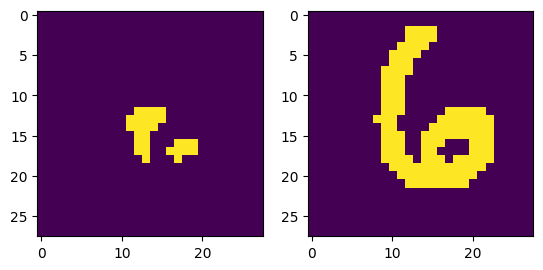

In [ ]:
imgs = [no3[405,:,:],  no6[445,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img>0)
  plt.show()

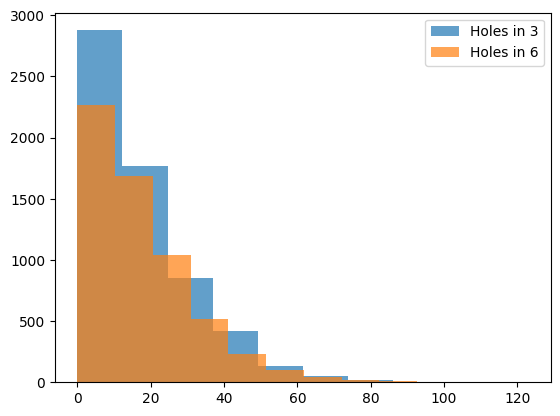

In [ ]:
hole3 = np.array([getHolePixels(i).sum() for i in no3])
hole6 = np.array([getHolePixels(i).sum() for i in no6])

plt.hist(hole3, alpha=0.7, label = 'Holes in 3');
plt.hist(hole6, alpha=0.7, label = 'Holes in 6');
plt.legend()

#### The hole pixels feature is also not good enough to differentiate digits 3 and 6.

#### Hull pixels feature

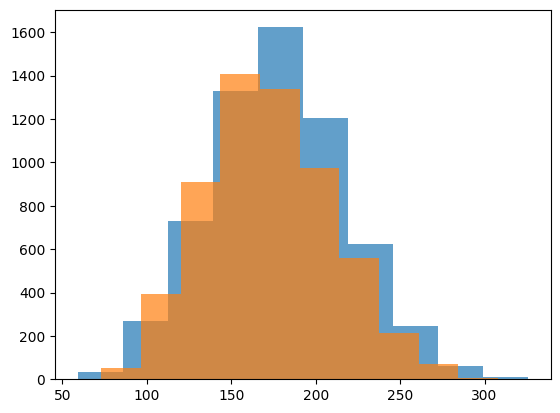

In [ ]:
hull3 = np.array([getHullPixels(i).sum() for i in no3])
hull6 = np.array([getHullPixels(i).sum() for i in no6])

plt.hist(hull3, alpha=0.7);
plt.hist(hull6, alpha=0.7);

#### Boundary pixels feature

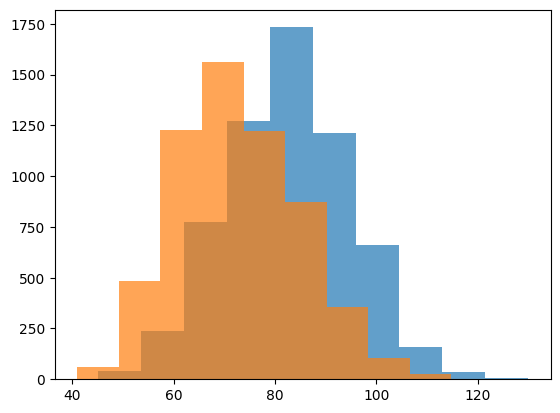

In [ ]:
bound3 = np.array([getBoundaryPixels(i).sum() for i in no3])
bound6= np.array([getBoundaryPixels(i).sum() for i in no6])

plt.hist(bound3, alpha=0.7);
plt.hist(bound6, alpha=0.7);

#### So we cannot differentiate the digits 3 and 6 using any of the above features.
#### Therefore, The above features cannot be used to differentiate all of the digits.

#### 5. What will happen if we take more than two classes at a time?

In [ ]:
no5 = train_X[train_y==5, :, :]
no7 = train_X[train_y==7, :, :]
no9 = train_X[train_y==9, :, :]

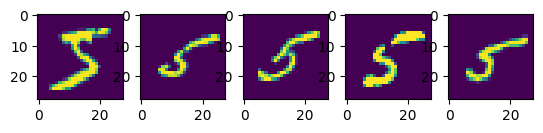

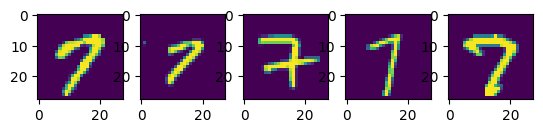

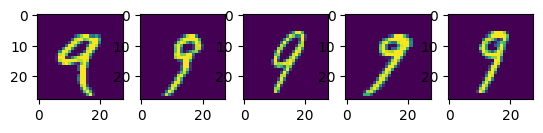

In [ ]:
for i in [5, 7, 9]:
  for j in range(5):
    img = locals()[f'no{i}'][j, :, :]
    plt.subplot(3, 5, j+1)
    plt.imshow(img)
  plt.show()

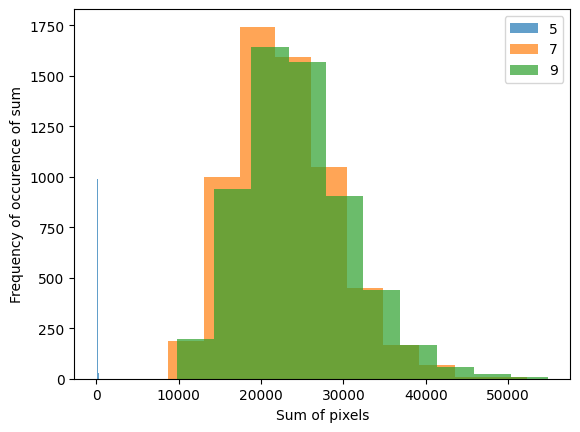

In [ ]:
plt.hist(np.sum(no5>0, (1,2)), alpha=0.7, label = '5');
plt.hist(np.sum(no7, (1,2)), alpha=0.7, label = '7');
plt.hist(np.sum(no9, (1,2)), alpha=0.7, label = '9');
plt.xlabel('Sum of pixels')
plt.ylabel('Frequency of occurence of sum')
plt.legend()

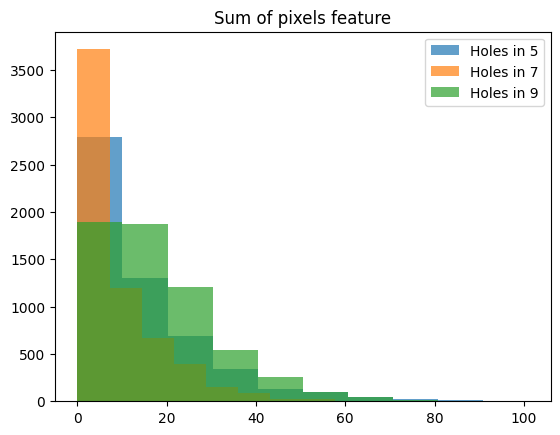

In [ ]:
hole5 = np.array([getHolePixels(i).sum() for i in no5])
hole7 = np.array([getHolePixels(i).sum() for i in no7])
hole9 = np.array([getHolePixels(i).sum() for i in no9])

plt.hist(hole5, alpha=0.7, label = 'Holes in 5');
plt.hist(hole7, alpha=0.7, label = 'Holes in 7');
plt.hist(hole9, alpha=0.7, label = 'Holes in 9');
plt.title('Sum of pixels feature')
plt.legend()

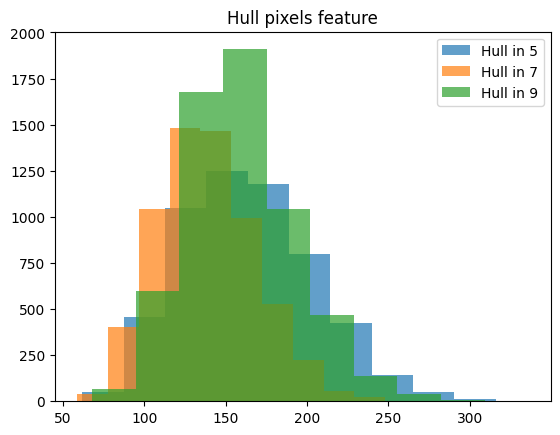

In [ ]:
hull5 = np.array([getHullPixels(i).sum() for i in no5])
hull7 = np.array([getHullPixels(i).sum() for i in no7])
hull9 = np.array([getHullPixels(i).sum() for i in no9])

plt.hist(hull5, alpha=0.7, label = 'Hull in 5');
plt.hist(hull7, alpha=0.7, label = 'Hull in 7');
plt.hist(hull9, alpha=0.7, label = 'Hull in 9');
plt.title('Hull pixels feature')
plt.legend()

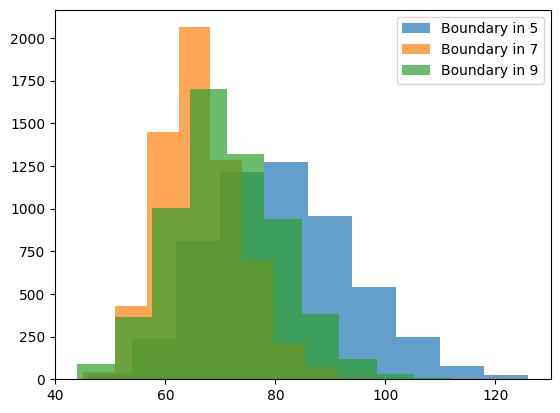

In [ ]:
bound5 = np.array([getBoundaryPixels(i).sum() for i in no5])
bound7 = np.array([getBoundaryPixels(i).sum() for i in no7])
bound9 = np.array([getBoundaryPixels(i).sum() for i in no9])

plt.hist(bound5, alpha=0.7, label = 'Boundary in 5');
plt.hist(bound7, alpha=0.7, label = 'Boundary in 7');
plt.hist(bound9, alpha=0.7, label = 'Boundary in 9');
plt.legend()

### The above digits are not at all differentiable with our feature set, but it varies depending on the combination of digits we are taking.